In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score , f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [3]:
import mlflow

In [4]:
mlflow.create_experiment('Employee Attrition v1')

'967323451770768818'

In [5]:
df=pd.read_csv('employee_churn.csv')

In [6]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

empid                    0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

C:\Users\Awais\AppData\Local\Temp\ipykernel_988\1794141267.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_montly_hours'])


<Axes: xlabel='average_montly_hours', ylabel='Density'>

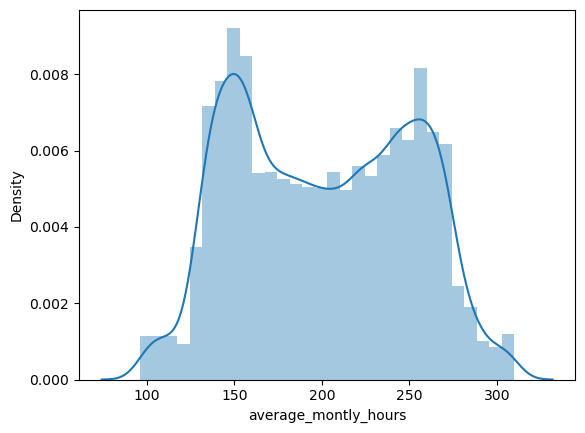

In [9]:
import seaborn as sns
sns.distplot(df['average_montly_hours'])

In [10]:
df['salary']=df['salary'].replace({'low':0,'medium':1,'high':2})

In [11]:
X=df.drop(['empid','left'],axis=1)
y=df['left']

In [12]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,0
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,0
4,0.37,0.52,2,159,3,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train, y_test=train_test_split(X , y , test_size=.2)

In [15]:
print(x_train.shape , x_test.shape)

(11997, 8) (3000, 8)


In [16]:
mlflow.set_experiment('Employee Attrition v1')

<Experiment: artifact_location='file:///C:/Users/Awais/Desktop/Machine_learning_ETEP/Employee_Attrition/mlruns/967323451770768818', creation_time=1705986154630, experiment_id='967323451770768818', last_update_time=1705986154630, lifecycle_stage='active', name='Employee Attrition v1', tags={}>

In [18]:
run1=mlflow.start_run()

In [19]:
run1.info

<RunInfo: artifact_uri='file:///C:/Users/Awais/Desktop/Machine_learning_ETEP/Employee_Attrition/mlruns/967323451770768818/fcd1ca14262c4553851710cd08b4a680/artifacts', end_time=None, experiment_id='967323451770768818', lifecycle_stage='active', run_id='fcd1ca14262c4553851710cd08b4a680', run_name='unequaled-sponge-353', run_uuid='fcd1ca14262c4553851710cd08b4a680', start_time=1705986261042, status='RUNNING', user_id='Awais'>

# Lets try all of those models without hyper-parameter tunning

In [20]:
algos={
    'SVC':svc,
    'KNC':knc,
    'LR':lr,
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc
}

In [21]:
pre_acc = {}
for name,algo in algos.items():
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    pre_acc[name] = {
        'Precision': precision_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

C:\Users\Awais\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
pre_acc

{'SVC': {'Precision': 0.0,
  'Accuracy': 0.7566666666666667,
  'Confusion Matrix': array([[2270,    0],
         [ 730,    0]], dtype=int64)},
 'KNC': {'Precision': 0.8585987261146497,
  'Accuracy': 0.9443333333333334,
  'Confusion Matrix': array([[2159,  111],
         [  56,  674]], dtype=int64)},
 'LR': {'Precision': 0.604494382022472,
  'Accuracy': 0.7876666666666666,
  'Confusion Matrix': array([[2094,  176],
         [ 461,  269]], dtype=int64)},
 'DTC': {'Precision': 0.9669540229885057,
  'Accuracy': 0.9733333333333334,
  'Confusion Matrix': array([[2247,   23],
         [  57,  673]], dtype=int64)},
 'RFC': {'Precision': 0.9943422913719944,
  'Accuracy': 0.9896666666666667,
  'Confusion Matrix': array([[2266,    4],
         [  27,  703]], dtype=int64)},
 'ABC': {'Precision': 0.9191073919107392,
  'Accuracy': 0.957,
  'Confusion Matrix': array([[2212,   58],
         [  71,  659]], dtype=int64)},
 'BC': {'Precision': 0.9887640449438202,
  'Accuracy': 0.9886666666666667,
  'Conf

In [23]:
mlflow.log_metrics({'Precision':pre_acc['RFC']['Precision'], 'Accuracy':pre_acc['RFC']['Accuracy'] , 'f1_score':f1_score(y_test, rfc.predict(x_test))})

In [24]:
mlflow.log_artifact('models.ipynb')

In [25]:
## Best model is Random Forest of 99% accuracy and precision
mlflow.end_run()

# We are already obtaining good results but lemme show you how to tune the parameters using Grid Search CV

In [26]:
run2=mlflow.start_run()

In [27]:
run2.info

<RunInfo: artifact_uri='file:///C:/Users/Awais/Desktop/Machine_learning_ETEP/Employee_Attrition/mlruns/967323451770768818/97da94c8abd34c85b7f2e18939dd4402/artifacts', end_time=None, experiment_id='967323451770768818', lifecycle_stage='active', run_id='97da94c8abd34c85b7f2e18939dd4402', run_name='merciful-snail-719', run_uuid='97da94c8abd34c85b7f2e18939dd4402', start_time=1705986288028, status='RUNNING', user_id='Awais'>

In [28]:
from sklearn.model_selection import GridSearchCV
# Define classifiers and their initial parameters
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=50, random_state=2),
    'BaggingClassifier': BaggingClassifier(n_estimators=50, random_state=2),
    'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=50, random_state=2)
}

# Define parameter grids for GridSearchCV
param_grids = {
    'RandomForestClassifier': {'n_estimators': [10, 50, 100, 130], 'criterion': ['gini', 'entropy'],
                               'max_features': ['auto', 'log2']},
    'BaggingClassifier': {'n_estimators': [10, 50, 100, 200], 'max_samples': [1, 5, 10, 20]},
    'ExtraTreesClassifier': {'n_estimators': [10, 50, 100, 130], 'criterion': ['gini', 'entropy'],
                              'max_features': ['auto', 'log2']}
}

# Loop through each classifier and perform hyperparameter tuning
best_estimators = {}
for classifier_name, classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    clf = GridSearchCV(classifier, param_grid, cv=5, return_train_score=False)
    clf.fit(x_train, y_train)  # Assuming X_train and y_train are your training data

    # Store the best estimator and its parameters
    best_estimators[classifier_name] = {
        'best_estimator': clf.best_estimator_,
        'best_params': clf.best_params_,
        'best_score': clf.best_score_
    }

# Print the results
for classifier_name, result in best_estimators.items():
    print(f"Best Estimator for {classifier_name}: {result['best_estimator']}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Cross-Validation Score: {result['best_score']}\n")


C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Awais\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Best Estimator for RandomForestClassifier: RandomForestClassifier(max_features='log2', n_estimators=130, random_state=2)
Best Parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 130}
Best Cross-Validation Score: 0.99016413088787

Best Estimator for BaggingClassifier: BaggingClassifier(max_samples=20, n_estimators=200, random_state=2)
Best Parameters: {'max_samples': 20, 'n_estimators': 200}
Best Cross-Validation Score: 0.9083090871196331

Best Estimator for ExtraTreesClassifier: ExtraTreesClassifier(max_features='log2', n_estimators=130, random_state=2)
Best Parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 130}
Best Cross-Validation Score: 0.9874133666805613



In [29]:
best_estimators.items()

dict_items([('RandomForestClassifier', {'best_estimator': RandomForestClassifier(max_features='log2', n_estimators=130, random_state=2), 'best_params': {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 130}, 'best_score': 0.99016413088787}), ('BaggingClassifier', {'best_estimator': BaggingClassifier(max_samples=20, n_estimators=200, random_state=2), 'best_params': {'max_samples': 20, 'n_estimators': 200}, 'best_score': 0.9083090871196331}), ('ExtraTreesClassifier', {'best_estimator': ExtraTreesClassifier(max_features='log2', n_estimators=130, random_state=2), 'best_params': {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 130}, 'best_score': 0.9874133666805613})])

In [30]:
rfc_best=RandomForestClassifier(criterion='entropy' , max_features='log2', n_estimators=100)
rfc_best.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2')

In [31]:
y_pred=rfc_best.predict(x_test)

In [32]:
accuracy_score(y_test, y_pred)

0.9903333333333333

In [33]:
precision_score(y_test, y_pred)

0.9943582510578279

In [34]:
# We can save these 
mlflow.log_metrics({'Precision':precision_score(y_test, y_pred), 'Accuracy':accuracy_score(y_test, y_pred) , 'f1_score':f1_score(y_test,y_pred)})

In [35]:
mlflow.log_artifact('models.ipynb')

In [50]:
mlflow.end_run()

In [37]:
import mlflow.sklearn
mlflow.sklearn.save_model(rfc_best,"model_best_v1")

C:\Users\Awais\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Remember Our Dataset was unbalanced 
## So we can use 2 techniques here 
### 1. Drop the data and equalize it but its costly to drop a precious data
### 2. Synthesize data using SMOTE (We will be using this one)

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [51]:
mlflow.start_run()

<ActiveRun: >

In [52]:
y_resampled.value_counts() ## Yupp Now its balanced , Now we can train again with Random Forest

0    9158
1    9158
Name: left, dtype: int64

In [53]:
rfc_resampled=RandomForestClassifier(n_estimators=50, random_state=2)

In [54]:
rfc_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=50, random_state=2)

In [55]:
accuracy_score(y_test, rfc_resampled.predict(x_test))

0.9886666666666667

In [56]:
precision_score(y_test, rfc_resampled.predict(x_test))

0.9887640449438202

In [57]:
mlflow.sklearn.save_model(rfc_resampled,"model_best_v2_resample")

In [58]:
mlflow.sklearn.log_model(rfc_resampled, 'Logging_model_v2_resampling')

In [59]:
mlflow.end_run()

In [62]:
mlflow.last_active_run().info.run_id

'9ac65fdfd383457e94d664f377f5b769'

In [72]:
eval_data=x_test

In [73]:
eval_data['left']=y_test

In [76]:
mlflow.evaluate(
'runs:/9ac65fdfd383457e94d664f377f5b769/Logging_model_v2_resampling',
    data=eval_data,
    targets='left',
    model_type='classifier'
)

C:\Users\Awais\anaconda3\lib\site-packages\mlflow\data\pandas_dataset.py:134: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  return _infer_schema(self._df)
2024/01/23 10:43:14 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
2024/01/23 10:43:14 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.
2024/01/23 10:43:1

<Figure size 1050x700 with 0 Axes>